In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from scipy import stats
from math import exp
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### Q1: Logit Model for Credit Grant Outcome use case
A group of 20 customers possess portfolio ranging from 0.5 to 6.5 million USD in one of the largest Financial Services majors in South America. As an analyst you are tasked to find out how the portfolio amount affect the probability of a customer getting a credit grant? Please refer to the dataset provided in
GitHub - CreditGrantOutcome.csv.

In [3]:
CreditGrantOutcome_df = pd.read_csv("C:\\Users\\theco\\CreditGrantOutcome.csv")

In [4]:
CreditGrantOutcome_df.head()

,PortfolioValue,CreditGrantDecision
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


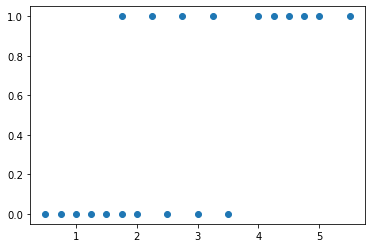

In [5]:
#Visualizing the dataset
plt.scatter(CreditGrantOutcome_df["PortfolioValue"], CreditGrantOutcome_df["CreditGrantDecision"])

In [36]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
CreditGrantOutcome_df['CreditGrantDecision'] = number.fit_transform(CreditGrantOutcome_df['CreditGrantDecision'].astype('str')) 
CreditGrantOutcome_df['PortfolioValue'] = number.fit_transform(CreditGrantOutcome_df['PortfolioValue'].astype('int'))
model = smf.logit(formula="CreditGrantDecision~ + PortfolioValue", data = CreditGrantOutcome_df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.439195
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     CreditGrantDecision   No. Observations:                   20
Model:                           Logit   Df Residuals:                       18
Method:                            MLE   Df Model:                            1
Date:                 Sat, 17 Sep 2022   Pseudo R-squ.:                  0.3664
Time:                         23:52:46   Log-Likelihood:                -8.7839
converged:                        True   LL-Null:                       -13.863
Covariance Type:             nonrobust   LLR p-value:                  0.001437
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.9519      1.337     -2.208      0.027      -5.572      -0.332
Portfolio

In [31]:
model_odd=pd.DataFrame(np.exp(model.params), columns = ['OR'])
model_odd['Z-Value'] = model.pvalues
model_odd[['2.5%', '97.5%']] = np.exp(model.conf_int())
print(model_odd)

                      OR   Z-Value      2.5%     97.5%
Intercept       0.052239  0.027215  0.003804  0.717412
PortfolioValue  3.508652  0.016582  1.256545  9.797213


b0 = 0.05, b1 = 3.51

y = b0 + b1 * x1
 when x1 = 2

In [48]:
y = 0.05 + 3.51 * 2
print(y)

7.069999999999999


### Q2: Confusion Matrix Scenario
You are working on a binary classification model to predict which devices are going to fail or not fail in the
future. What is the accuracy of your model given the confusion matrix below? (Rounded to 1 place after decimal)

In [ ]:
df = pd.DataFrame([
    [371, 84], 
    [65, 122],
], columns = ["x", "y"])

In [ ]:
df

In [ ]:
tab = pd.crosstab(df['x'], df['y'])

In [ ]:
tab = pd.crosstab(df['x'], df['y'])
np.diag(tab).sum() / tab.to_numpy().sum()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

def confusion_matrix_scorer(df, X, y):
      y_pred = df.predict(X)
      cm = confusion_matrix(y, y_pred)
      acc = accuracy_score(y, y_pred)
      return {
          'acc': acc,
          'tn': cm[0, 0], 
          'fp': cm[0, 1],
          'fn': cm[1, 0], 
          'tp': cm[1, 1]
      }

### Q3: Logit/GLM Model for Insurance Cross Sell use case
The insurance major is interested to understand the cross-sell opportunities by analysing the information it
has. As a Data Scientist, you have access to the Insurance Cross Sell data. (Please refer to GitHub -
InsuranceCrossSell.csv).

In [49]:
InsuranceCrossSell_df = pd.read_csv("C:\\Users\\theco\\InsuranceCrossSell.csv")

In [50]:
InsuranceCrossSell_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0


In [51]:
# Categorical variables have to be converted to dummies, before passing into the model.
cat_var = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

# Numerical Variables
num_var = ['Age', 'Region_COde','Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [52]:
model_df = pd.get_dummies(data=InsuranceCrossSell_df, 
                          columns=cat_var,
                          drop_first = True)
model_df.drop(columns='id', inplace=True)

In [53]:
model_df.columns

Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Gender_Male', 'Driving_License_1', 'Previously_Insured_1',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_Yes',
       'Response_1'],
      dtype='object')

In [59]:
Y = model_df['Driving_License_1']
X = model_df.drop(columns='Driving_License_1')
X = sm.add_constant(X)

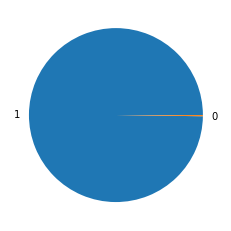

In [60]:
#Distrubution of InsuranceCrossSell variable
y_freq = Y.value_counts()
plt.pie(y_freq, labels=y_freq.index )
plt.show() 

In [61]:
# Fit the logit model
logit_model = sm.Logit(Y,X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.002114
         Iterations 16


In [63]:
import warnings
warnings.filterwarnings('ignore')
print(result.summary2())

                            Results: Logit
Model:                 Logit              Pseudo R-squared:  inf      
Dependent Variable:    Driving_License_1  AIC:               1635.2878
Date:                  2022-09-18 14:06   BIC:               1765.4978
No. Observations:      381109             Log-Likelihood:    -805.64  
Df Model:              11                 LL-Null:           0.0000   
Df Residuals:          381097             LLR p-value:       1.0000   
Converged:             1.0000             Scale:             1.0000   
No. Iterations:        16.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 11.5707   0.2850  40.5920 0.0000 11.0120 12.1293
Age                   -0.1010   0.0033 -31.0033 0.0000 -0.1074 -0.0946
Region_Code            0.0034   0.

### 1. Likelihood Ratio Test: The LLR-p-value is 1.0000 (>>0.05), indicating that the model overall is not significant.
### 2. Wald's Test: We see that two (2) variables have p-value corresponding to the Wlad's test >0.05. We will remove those and retrain the model

In [64]:
def get_significant_vars(model, alpha=0.05):
    
    #store the variable and p-values in a dataframe
    p_vals = pd.DataFrame(model.pvalues)  
    p_vals['vars'] = p_vals.index
    p_vals.columns = ['pval', 'name']
    
    #return those that are significant at alpha value
    return list(p_vals[p_vals.pval <= alpha]['name'])

In [65]:
significant_vars = get_significant_vars(result)

In [66]:
# Fit the logit model
X_new = X[significant_vars] #constant is already added          

logit_model = sm.Logit(Y,X_new)
final_model = logit_model.fit()
print(final_model.summary2())

Optimization terminated successfully.
         Current function value: 0.002114
         Iterations 16
                            Results: Logit
Model:                 Logit              Pseudo R-squared:  inf      
Dependent Variable:    Driving_License_1  AIC:               1631.2948
Date:                  2022-09-18 14:20   BIC:               1739.8032
No. Observations:      381109             Log-Likelihood:    -805.65  
Df Model:              9                  LL-Null:           0.0000   
Df Residuals:          381099             LLR p-value:       1.0000   
Converged:             1.0000             Scale:             1.0000   
No. Iterations:        16.0000                                        
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 11.6237   0.2666  43.5956 0.0000 11.1011 12.1463
Ag

#### The model overall is not significant, sinceLLR p-value > 0.05, but the predictors with p-value < 0.05 are significant in the model